In [3]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import cv2
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
sys.path.append(os.path.join(ROOT_DIR, "Mask_RCNN/samples/coco/"))  # To find local version


# Import COCO config
from Mask_RCNN.samples.coco import coco

%matplotlib inline 

In [4]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [6]:
# output = "final_output.mp4"
clip1 = VideoFileClip("original_clip.mp4")
# clip1.write_videofile(output, audio=False)

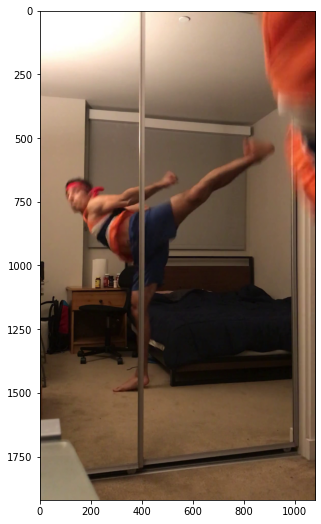

In [9]:
testframe = clip1.get_frame(5.2)
plt.figure(figsize=(30,9))
plt.imshow(testframe)

In [10]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights(os.path.join(ROOT_DIR, "mask_rcnn_coco.h5"), by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [11]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (1920, 1080, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


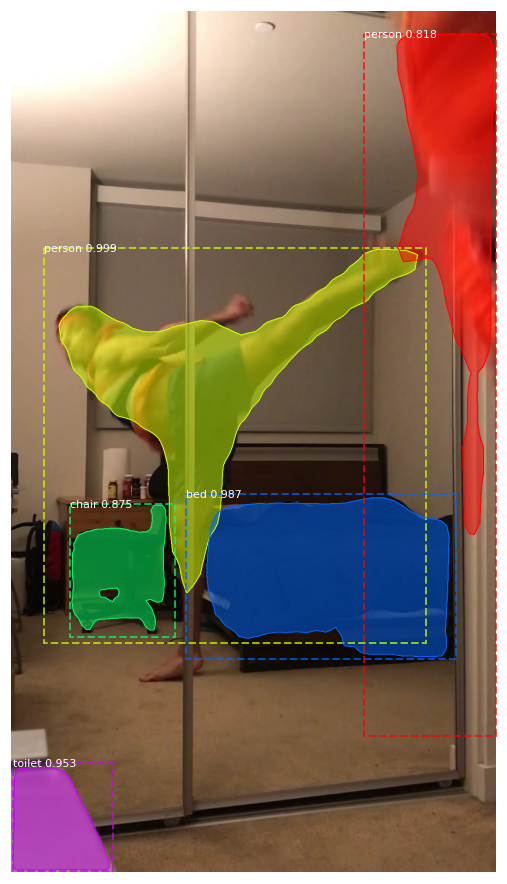

In [16]:
# Run detection
results = model.detect([testframe], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(testframe, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
def process_image(image):
    '''
    useful comment
    '''
    # Run detection
    results = model.detect([image], verbose=1)
    r = results[0]
    
    # Get the indices of the mask
    human_ind = class_names.index('person')
    human_mask_inds = np.where(r['class_ids'] == human_ind)[0]
    final_mask = np.any(r['masks'][:,:,human_mask_inds],axis=2)
    indsx, indsy = np.where(final_mask==True)
    
    # Apply mask
    masked_image = np.zeros_like(testframe)
    masked_image[a_inds_x, a_inds_y, :] = image[indsx, indsy, :]


    
    

In [52]:
human_ind = class_names.index('person')
human_mask_inds = np.where(r['class_ids'] == human_ind)[0]
final_mask = np.any(r['masks'][:,:,human_mask_inds],axis=2)

a_inds_x, a_inds_y = np.where(final_mask==True)
print(a_inds_x)

[  51   51   51 ... 1295 1295 1296]


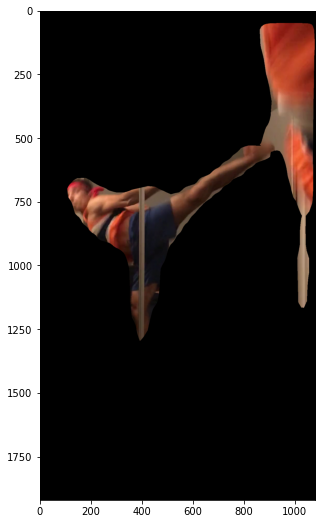

In [55]:
a = np.zeros_like(testframe)
a_inds = np.where(final_mask==True)

# print(final_mask)
# print(a_inds)
a[a_inds_x, a_inds_y, :] = testframe[a_inds_x, a_inds_y, :]
plt.figure(figsize=(30,9))
plt.imshow(a)                                      